In [1]:
import pandas as pd ,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this will help us to expand the size of the data that is going to get displayed
# pd.set_option('display.max_rows',12)
# pd.set_option('display.max_columns',12)

#warnings will be ignored with the help of this syntax
import warnings
warnings.filterwarnings('ignore')

%autosave 1

Autosaving every 1 seconds


In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"for the new applications we have {titanic_train.shape[0]} datapoints with {titanic_train.shape[1]} features")

for the new applications we have 891 datapoints with 12 features


In [5]:
#getting the information about the each of the columns 
titanic_train.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#this will help us to take a look at the count,mean ,std deviation,min ,max and the interquartile range of the data 
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
import plotly.express as px

In [36]:
fig = px.bar((titanic_train.isna().mean().sort_values(ascending=False))*100,text_auto='.4s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside",cliponaxis=False)
fig.update_layout(xaxis_title="Features", yaxis_title="Missing percentage",
                 title={
        'text': "Missing value analysis",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [37]:
df = titanic_train.loc[:, titanic_train.isnull().mean() < .10]
print(f"after dropping the features we have {df.shape[0]} datapoints and {df.shape[1]} features")

after dropping the features we have 891 datapoints and 10 features


In [39]:
fig = px.bar((df.isna().mean().sort_values(ascending=False))*100,text_auto='.4s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside",cliponaxis=False)
fig.update_layout(xaxis_title="Features", yaxis_title="Missing percentage",
                 title={
        'text': "Missing value analysis",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [40]:
def nan_checking(col_name):
   
    if col_name.dtype=='object':
        
        col_name.fillna(col_name.mode()[0],inplace=True)
        print('missing values filled with mode')
        return(f"because for {col_name.name} mode is the best method to fill but there is no abs difference as the dtype is object\n")

    else:
        addition_org=[col_name.mean(),col_name.median(),col_name.mode()[0]]
       
        org_sum = sum(addition_org)
       
        addition_mean=[col_name.fillna(col_name.mean()).mean(),col_name.fillna(col_name.mean()).median(),col_name.fillna(col_name.mean()).mode()[0]]

        mean_sum = sum(addition_mean)

        addition_median=[col_name.fillna(col_name.median()).mean(),col_name.fillna(col_name.median()).median(),col_name.fillna(col_name.median()).mode()[0]]

        median_sum = sum(addition_median)
  
        addition_mode=[col_name.fillna(col_name.mode()[0]).mean(),col_name.fillna(col_name.mode()[0]).median(),col_name.fillna(col_name.mode()[0]).mode()[0]]

        mode_sum = sum(addition_mode)

        dic={"mean"  : abs(org_sum-mean_sum),
            "median" : abs(org_sum-median_sum),
            "mode"  : abs(org_sum-mode_sum)}
       
        if min(dic,key=dic.get) == 'mean':
            col_name.fillna(col_name.mean(),inplace=True)
            print('missing values filled with mean')
        elif min(dic,key=dic.get) == 'median':
            col_name.fillna(col_name.median(),inplace=True)
            print('missing values filled with median')
        else :
            col_name.fillna(col_name.mode()[0],inplace=True)
            print('missing values filled with mode')
     
        return(f"because for {col_name.name} {min(dic,key=dic.get)} is the best value to fill and the absolute difference is {dic[min(dic,key=dic.get)]}\n")

In [41]:
list_of_null_columns=[]

for k,v in (df.isna().mean().sort_values(ascending=False)>0)[:(df.isna().mean().sort_values(ascending=False)>0).sum()].items():
    list_of_null_columns.append(k)

for x in list_of_null_columns:
    print(f"{nan_checking(df[x])}")

missing values filled with mode
because for Embarked mode is the best method to fill but there is no abs difference as the dtype is object



In [45]:
(df.isna().mean().sort_values(ascending=False)>0).sum()

0

In [44]:
fig = px.bar((df.isna().mean().sort_values(ascending=False))*100,text_auto='.4s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside",cliponaxis=False)
fig.update_layout(xaxis_title="Features", yaxis_title="Missing percentage",
                 title={
        'text': "Missing value analysis",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [46]:
#checking the data 
import random
df.iloc[random.randint(0,len(df))]

PassengerId                  812
Survived                       0
Pclass                         3
Name           Lester, Mr. James
Sex                         male
SibSp                          0
Parch                          0
Ticket                 A/4 48871
Fare                       24.15
Embarked                       S
Name: 811, dtype: object

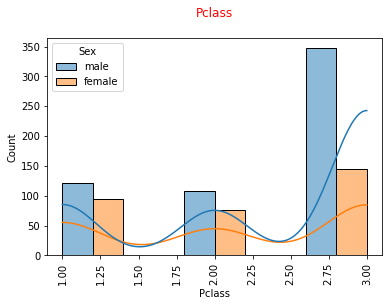

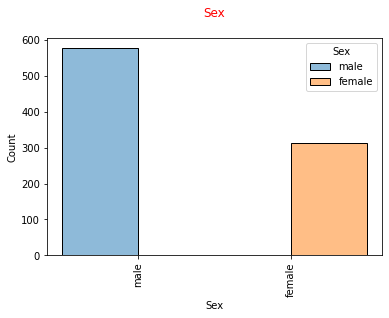

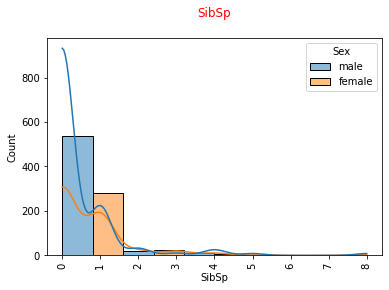

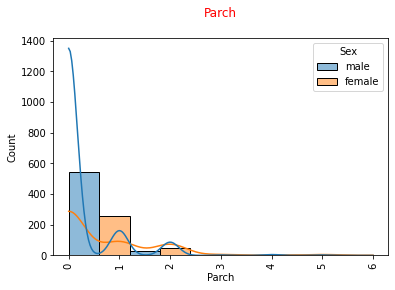

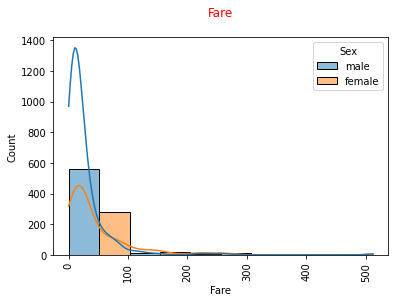

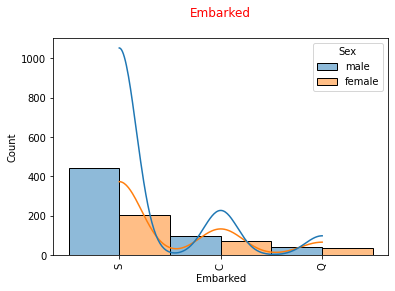

In [56]:
mul = ['Pclass','Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

for s in mul:
      sns.histplot(data=df, x=s,hue='Sex',multiple="dodge",kde=True,bins=5)
      plt.title(f"{s}\n",color='red')
      plt.xticks(rotation=90)
      #plt.savefig(f'{s}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
      plt.show()
      #files.download(f'/content/{s}.png')
      print()